In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [84]:
data = pd.read_csv('sales_data_sample.csv', encoding='latin1')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [42]:
#Columns to Remove
to_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'PHONE']
data = data.drop(to_drop, axis=1)

In [43]:
#Check for null values
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [44]:
#ORDERDATE Should be in date time
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
X = data[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MONTH_ID']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
data['KMeansCluster'] = kmeans.labels_

In [46]:
agg_cluster = AgglomerativeClustering(n_clusters=4)
data['AggCluster'] = agg_cluster.fit_predict(X_scaled)

In [47]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCANCluster'] = dbscan.fit_predict(X_scaled)

In [48]:
# Apply distribution-based clustering (Gaussian Mixture Model)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
data['GMMCluster'] = gmm.fit_predict(X_scaled)

In [49]:
# Apply graph-based clustering (Spectral Clustering)
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10)
data['SpectralCluster'] = spectral.fit_predict(X_scaled)

In [50]:
# Apply compression-based clustering (BIRCH)
from sklearn.cluster import Birch
birch = Birch(n_clusters=4)
data['BIRCHCluster'] = birch.fit_predict(X_scaled)

In [51]:
# Apply graph-based clustering (MeanShift)
from sklearn.cluster import MeanShift
mean_shift = MeanShift()
data['MeanShiftCluster'] = mean_shift.fit_predict(X_scaled)

In [52]:
# Apply graph-based clustering (Affinity Propagation)
from sklearn.cluster import AffinityPropagation
affinity_propagation = AffinityPropagation()
data['AffinityPropagationCluster'] = affinity_propagation.fit_predict(X_scaled)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


K-Means - Silhouette Score: 0.29
Hierarchical - Silhouette Score: 0.22
DBSCAN - Silhouette Score: 0.35
GMM - Silhouette Score: 0.16
Birch - Silhouette Score: 0.18
SpectralClustering - Silhouette Score: 0.28
The best clustering algorithm is: DBSCAN with Silhouette Score: 0.35


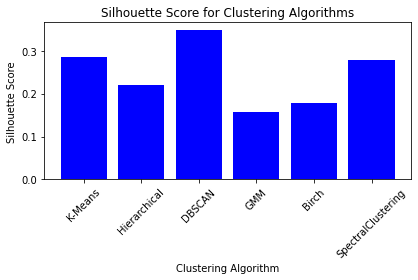

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering

# Load the dataset with the specified encoding
data = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Data Preprocessing

# 1. Handle Missing Values
data.fillna('', inplace=True)  # Replace missing values with an empty string ('')

# 2. Select relevant columns for clustering
X = data[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MONTH_ID']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the clustering algorithms
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0),
    'Hierarchical': AgglomerativeClustering(n_clusters=4),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=4),
    'Birch': Birch(n_clusters=4),
    'SpectralClustering': SpectralClustering(n_clusters=4)
}

best_algorithm = None
best_silhouette_score = -1

# Apply each clustering algorithm and evaluate with silhouette score
silhouette_scores = []

for algorithm_name, algorithm in clustering_algorithms.items():
    cluster_labels = algorithm.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'{algorithm_name} - Silhouette Score: {silhouette_avg:.2f}')
    
    # Check if the current algorithm is the best
    if silhouette_avg > best_silhouette_score:
        best_algorithm = algorithm_name
        best_silhouette_score = silhouette_avg

# Plot the Silhouette Score graph
plt.bar(clustering_algorithms.keys(), silhouette_scores, color='b')
plt.title('Silhouette Score for Clustering Algorithms')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Print the best clustering algorithm
print(f'The best clustering algorithm is: {best_algorithm} with Silhouette Score: {best_silhouette_score:.2f}')

plt.show()
